<a href="https://colab.research.google.com/github/annisa456/Clustering-Happiness-Country-Using-KMeans/blob/main/K_Means_World_Happiness_Report_2015_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_excel('/content/2015.xlsx')
print(df)

         Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [ ]:
print(df.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [ ]:
X = df.iloc[:, 5:]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Economy (GDP per Capita)       158 non-null    float64
 1   Family                         158 non-null    float64
 2   Health (Life Expectancy)       158 non-null    float64
 3   Freedom                        158 non-null    float64
 4   Trust (Government Corruption)  158 non-null    float64
 5   Generosity                     158 non-null    float64
 6   Dystopia Residual              158 non-null    float64
dtypes: float64(7)
memory usage: 8.8 KB


In [ ]:
ssd = []
for k in range(1, 20):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(X)
    print(f"Done clustering in {time()-start:.3f}s")

    ssd.append(model.inertia_)

Clustering with n_clusters=1
Done clustering in 0.003s
Clustering with n_clusters=2
Done clustering in 0.003s
Clustering with n_clusters=3
Done clustering in 0.003s
Clustering with n_clusters=4
Done clustering in 0.003s
Clustering with n_clusters=5
Done clustering in 0.003s
Clustering with n_clusters=6
Done clustering in 0.004s
Clustering with n_clusters=7
Done clustering in 0.004s
Clustering with n_clusters=8
Done clustering in 0.004s
Clustering with n_clusters=9
Done clustering in 0.004s
Clustering with n_clusters=10
Done clustering in 0.004s
Clustering with n_clusters=11
Done clustering in 0.005s
Clustering with n_clusters=12
Done clustering in 0.005s
Clustering with n_clusters=13
Done clustering in 0.006s
Clustering with n_clusters=14
Done clustering in 0.006s
Clustering with n_clusters=15
Done clustering in 0.005s
Clustering with n_clusters=16
Done clustering in 0.005s
Clustering with n_clusters=17
Done clustering in 0.006s
Clustering with n_clusters=18
Done clustering in 0.005s
C

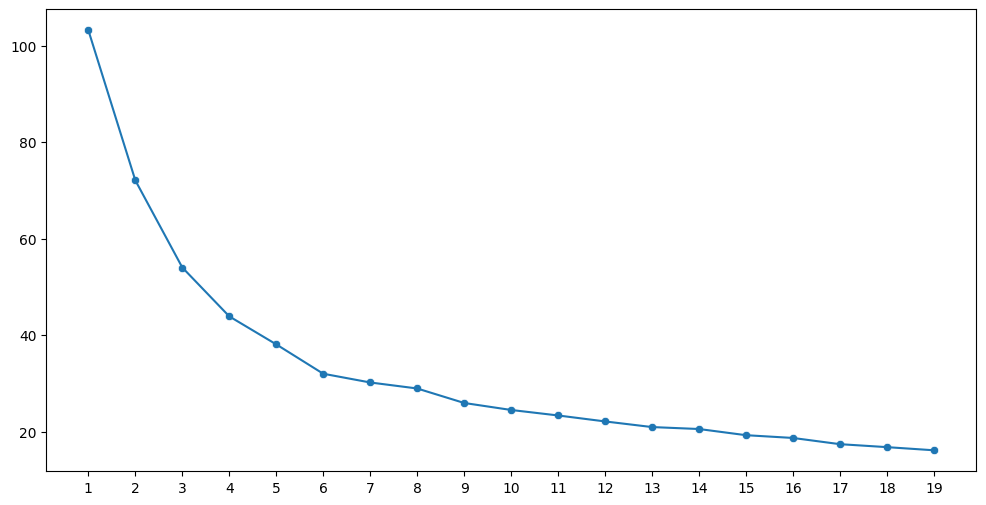

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 20), y=ssd)
sns.scatterplot(x=range(1, 20), y=ssd)
plt.xticks(range(1, 20))
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
# Silhouette Coefficient
# Code for the whole dataset
silhouette_scores = []

# may take a longer time to run
for k in range(2, 21):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(X)
    print(f"Done clustering in {time()-start:.3f}s")

    print("Calculating silhouette coefficient..")
    start = time()
    silhouette_scores.append(silhouette_score(X, model.labels_))
    print(f"Done calculating in {time()-start:.3f}s")

Clustering with n_clusters=2
Done clustering in 0.006s
Calculating silhouette coefficient..
Done calculating in 0.007s
Clustering with n_clusters=3
Done clustering in 0.006s
Calculating silhouette coefficient..
Done calculating in 0.006s
Clustering with n_clusters=4
Done clustering in 0.005s
Calculating silhouette coefficient..
Done calculating in 0.009s
Clustering with n_clusters=5
Done clustering in 0.005s
Calculating silhouette coefficient..
Done calculating in 0.006s
Clustering with n_clusters=6
Done clustering in 0.005s
Calculating silhouette coefficient..
Done calculating in 0.007s
Clustering with n_clusters=7
Done clustering in 0.005s
Calculating silhouette coefficient..
Done calculating in 0.008s
Clustering with n_clusters=8
Done clustering in 0.011s
Calculating silhouette coefficient..
Done calculating in 0.004s
Clustering with n_clusters=9
Done clustering in 0.009s
Calculating silhouette coefficient..
Done calculating in 0.003s
Clustering with n_clusters=10
Done clustering in

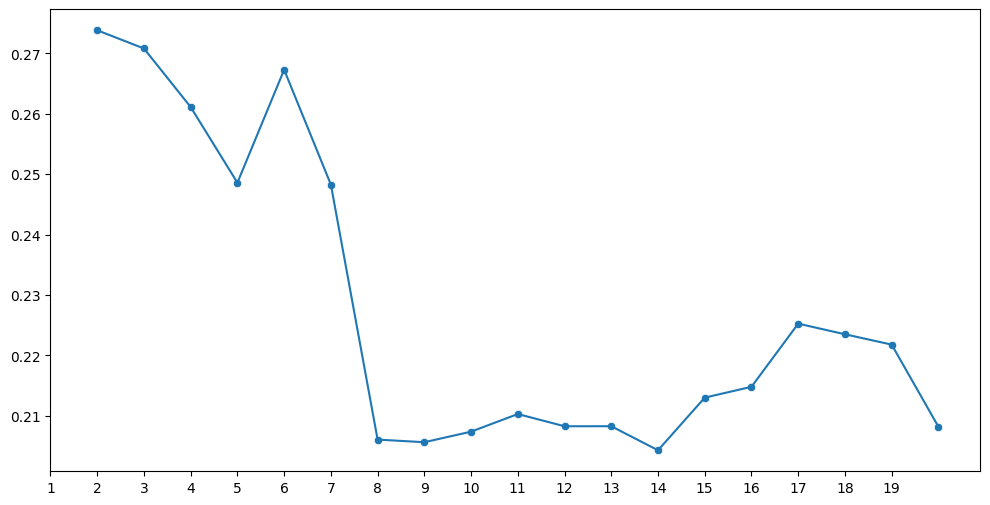

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(2, 21), y=silhouette_scores)
sns.scatterplot(x=range(2, 21), y=silhouette_scores)
plt.xticks(range(1, 20))
plt.show()

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans
# Membuat cluster sebanyak 5 cluster
K = 2
kmeans_2 = KMeans(n_clusters=K, random_state=11)

from time import time
start = time()
kmeans_2.fit(X)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.010s


In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans
# Membuat cluster sebanyak 5 cluster
K = 3
kmeans_3 = KMeans(n_clusters=K, random_state=11)

from time import time
start = time()
kmeans_3.fit(X)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.005s


In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans
# Membuat cluster sebanyak 5 cluster
K = 4
kmeans_4 = KMeans(n_clusters=K, random_state=11)

from time import time
start = time()
kmeans_4.fit(X)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.007s


In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans
# Membuat cluster sebanyak 5 cluster
K = 5
kmeans_5 = KMeans(n_clusters=K, random_state=11)

from time import time
start = time()
kmeans_5.fit(X)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.008s


In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans
# Membuat cluster sebanyak 5 cluster
K = 6
kmeans_6 = KMeans(n_clusters=K, random_state=11)

from time import time
start = time()
kmeans_6.fit(X)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.022s


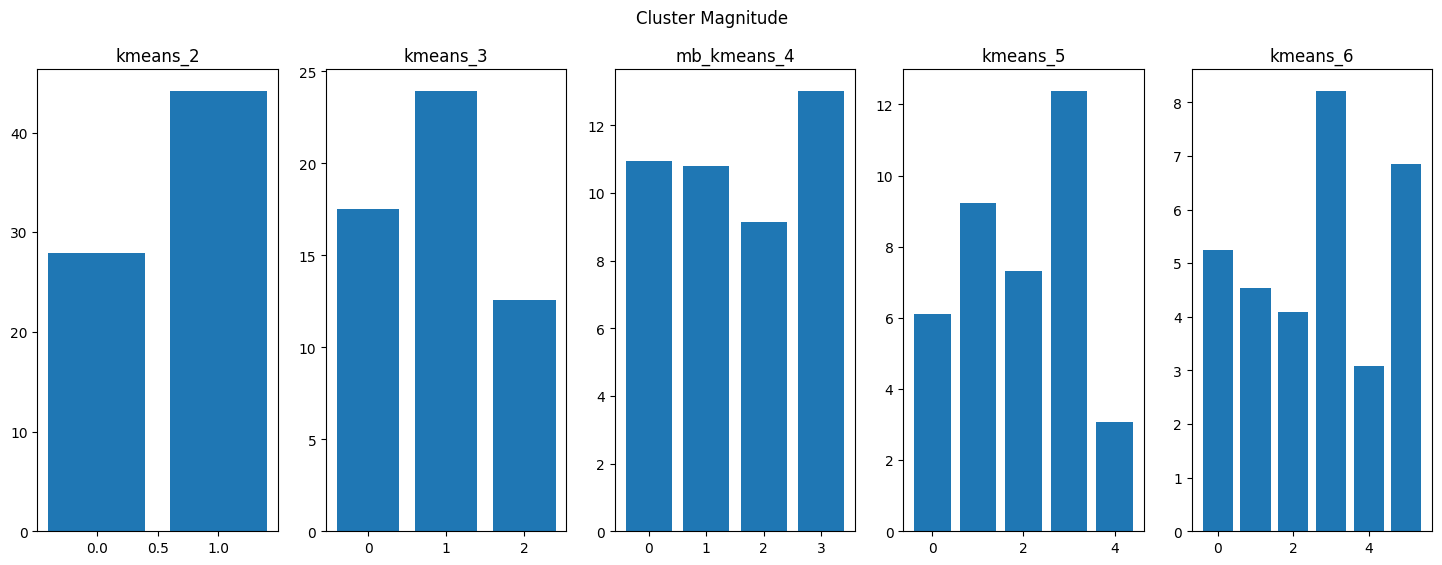

In [ ]:
import numpy as np
# Cluster Magnitude
fig, axis = plt.subplots(1, 5, figsize=(18, 6))
for ax, model, name in zip(axis,[kmeans_2, kmeans_3, kmeans_4, kmeans_5, kmeans_6],["kmeans_2", "kmeans_3", "mb_kmeans_4","kmeans_5","kmeans_6"]):
    distances = model.transform(X)
    preds = model.predict(X)
    inertia_per_cluster = np.array([sum(dist[c]**2 for dist, c in zip(distances, preds) if c == cluster)
        for cluster in range(model.n_clusters)])
    ax.bar(x=range(model.n_clusters), height=inertia_per_cluster)
    ax.set_title(name)
plt.suptitle("Cluster Magnitude")
plt.show()

In [ ]:
X = X.assign(
    clusters_of_2=kmeans_2.predict(X),
    clusters_of_3=kmeans_3.predict(X),
    clusters_of_4=kmeans_4.predict(X),
    clusters_of_5=kmeans_5.predict(X),
    clusters_of_6=kmeans_6.predict(X)
)

with pd.option_context("display.max_columns", None):
    display(X.head())

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,clusters_of_2,clusters_of_3,clusters_of_4,clusters_of_5,clusters_of_6
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0,0,0,0,0
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0,0,0,0,0
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,0,0,0,0
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,0,0,0,0
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0,0,0,0,0


/tmp/ipython-input-148-820911739.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-148-820911739.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-148-820911739.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-148-820911739.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-148-820911739.py:4: FutureWarning:



Passing `palette` without assigning `hue` is de

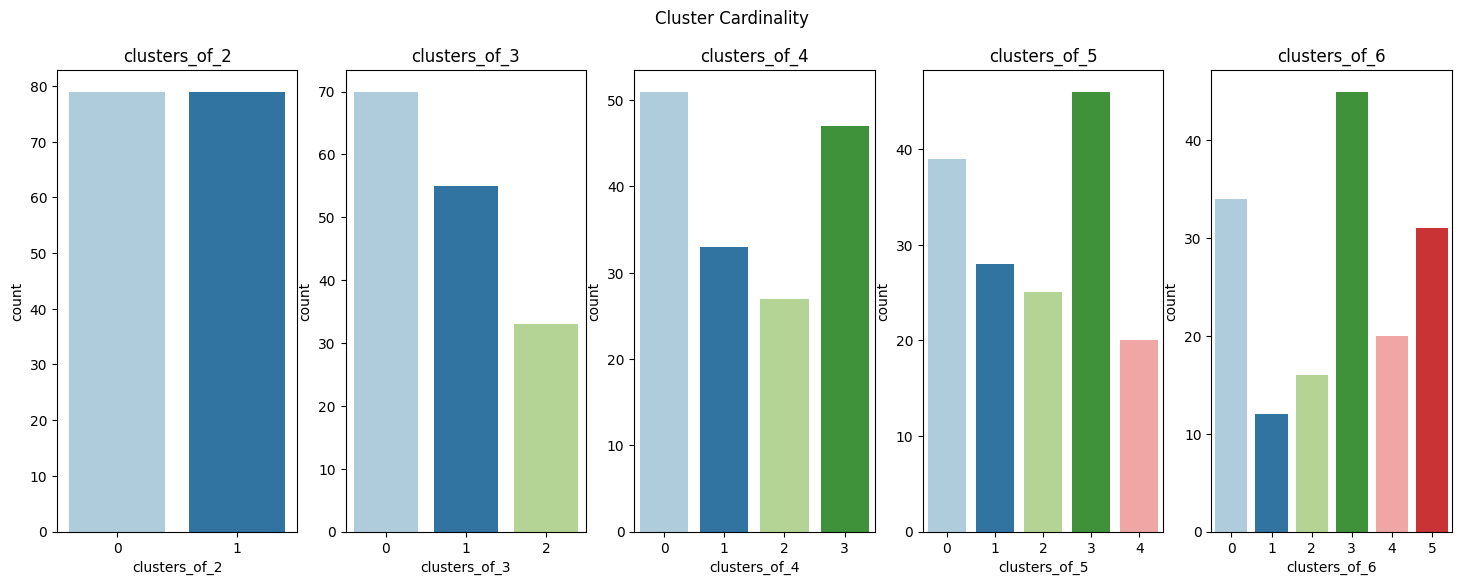

In [ ]:
# Cluster Cardinality
fig, axis = plt.subplots(1, 5, figsize=(18, 6))
for ax, preds in zip(axis,["clusters_of_2", "clusters_of_3", "clusters_of_4","clusters_of_5","clusters_of_6"]):
    sns.countplot(x=preds, data=X, ax=ax, palette="Paired")
    ax.set_title(preds)
plt.suptitle("Cluster Cardinality")
plt.show()

In [ ]:
fix = X.assign(cluster=X['clusters_of_4'])
fix.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,clusters_of_2,clusters_of_3,clusters_of_4,clusters_of_5,clusters_of_6,cluster
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0,0,0,0,0,0
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0,0,0,0,0,0
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,0,0,0,0,0
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,0,0,0,0,0
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0,0,0,0,0,0


In [ ]:
X = df.iloc[:, 4:]
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Buat DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = fix['cluster']  # label hasil clustering

import plotly.express as px

fig = px.scatter(df_pca, x='PC1', y='PC2', color=df_pca['cluster'].astype(str),
                 title="Cluster Visualization with PCA")
fig.show()

In [ ]:
from scipy.stats import kstest
stat, p = kstest(fix['Economy (GDP per Capita)'], 'norm')
print('Statistic=%.3f, p=%.3f' % (stat, p))
stat, p = kstest(fix['Family'], 'norm')
print('Statistic=%.3f, p=%.3f' % (stat, p))
stat, p = kstest(fix['Health (Life Expectancy)'], 'norm')
print('Statistic=%.3f, p=%.3f' % (stat, p))
stat, p = kstest(fix['Trust (Government Corruption)'], 'norm')
print('Statistic=%.3f, p=%.3f' % (stat, p))
stat, p = kstest(fix['Generosity'], 'norm')
print('Statistic=%.3f, p=%.3f' % (stat, p))
stat, p = kstest(fix['Dystopia Residual'], 'norm')
print('Statistic=%.3f, p=%.3f' % (stat, p))

Statistic=0.525, p=0.000
Statistic=0.641, p=0.000
Statistic=0.515, p=0.000
Statistic=0.500, p=0.000
Statistic=0.503, p=0.000
Statistic=0.848, p=0.000


In [ ]:
Total = fix.groupby('cluster').size().reset_index(name='Total')
Total

,cluster,Total
0,0,51
1,1,33
2,2,27
3,3,47


In [ ]:
# Mengitung segmentasi tiap klaster berdasarkan variabel yang bertipe numerik
segmentasi = fix.groupby('cluster').agg(
    Economy=('Economy (GDP per Capita)', 'median'),
    Family=('Family', 'median'),
    Health=('Health (Life Expectancy)', 'median'),
    Trust=('Trust (Government Corruption)', 'median'),
    Generosity=('Generosity', 'median'),
    Dystopia_Residual=('Dystopia Residual','median')
).reset_index()

segmentasi

,cluster,Economy,Family,Health,Trust,Generosity,Dystopia_Residual
0,0,1.21183,1.24018,0.81160,0.17383,0.23351,2.43209
1,1,0.35997,0.77265,0.36315,0.11686,0.21333,1.83302
2,2,0.52107,0.91451,0.40132,0.08786,0.22269,2.72230
3,3,1.01216,1.05818,0.73545,0.07521,0.17362,1.73933
